name: Limin Zhou  
id: 22634156  

Task: train an MLP and a CNN on cifar-10 dataset

# Load data

In [ ]:
from data_loader import DataLoader

In [ ]:
image_width, image_height, image_Nchannels = 32, 32, 3
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
               

In [ ]:
X, y = DataLoader.load_batch('data_batch')
X_test, y_test = DataLoader.load_batch('test_batch', Nbatches=1)

In [ ]:
print('X_test.shape =', X_test.shape, 'data type:', X_test.dtype)
print('y_test.shape =', y_test.shape, 'data type:', y_test.dtype)

X_test.shape = (10000, 32, 32, 3) data type: float32
y_test.shape = (10000,) data type: uint8


# Lab Task


### 1. split train set, 80% for train and 20% for validation

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

###2. display 20 randomly sampled image with label for three set.

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
# this function can randomly display 20 images, its params are X features and y is true result.
def displayImgs(X,y):
  # randomly pick 20 indexs
  random_index = np.random.randint(0, len(X), 20)
  # create a figure and set its size 
  fig=plt.figure(figsize=(15,5))

  # create 20 images by random 20 indexs
  for index, i in zip(random_index,range(1,21)):
    fig.add_subplot(2, 10, i)
    # set label
    plt.xlabel(class_names[y[index]])
    # display images
    plt.imshow(X[index])
  plt.show()

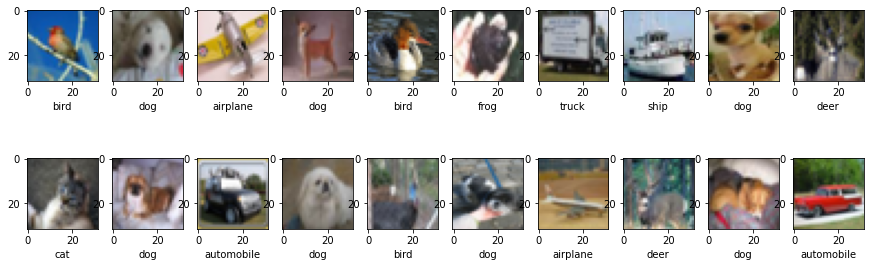

In [ ]:
# random display 20 images and corresponding label of train set
displayImgs(X_train ,y_train)

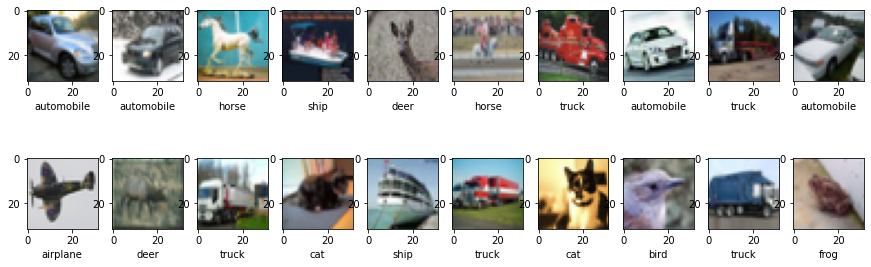

In [ ]:
# random display 20 images and corresponding label of valid set
displayImgs(X_valid, y_valid)

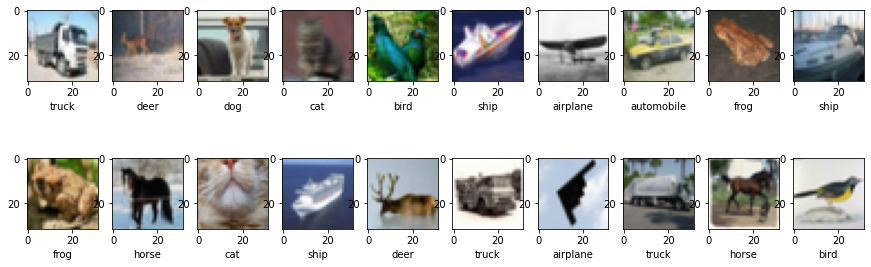

In [ ]:
# random display 20 images and corresponding label of test set
displayImgs(X_test,y_test)

###3. MLP

In [ ]:
# import tensorflow and check version
from tensorflow import keras
print('keras:', keras.__version__)

keras: 2.4.0


**MODEL FIT HISTORY DISTRIBUTION CHART FUNCTION:**

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

# this function can draw line charts for data in history, which is generated by fit model.
def draw_loss_acc(history):
  # plot chart by history dataframe, and set figure size
  pd.DataFrame(history.history).plot(figsize=(8, 5))
  # display grid
  plt.grid(True)
  # set y range from 0 to 2
  plt.gca().set_ylim(0, 2)
  plt.show()

**BUILD MLP:**

In [ ]:
def build_model_MLP(droprate,initializersSTD):
  model = keras.models.Sequential()

  # set a flatten layer and give input shape
  model.add(keras.layers.Flatten(input_shape=[32,32,3]))
  keras.layers.Dropout(rate=droprate)

  # first dense layer (256), with relu activation
  # model.add(keras.layers.Dense(256, activation="relu", kernel_initializer=keras.initializers.RandomNormal(stddev=initializersSTD)))
  # keras.layers.Dropout(rate=droprate)

  # second dense layer (128), with relu activation
  model.add(keras.layers.Dense(128, activation="relu", kernel_initializer=keras.initializers.RandomNormal(stddev=initializersSTD)))
  keras.layers.Dropout(rate=droprate)

  # third dense layer (64), with relu activation
  model.add(keras.layers.Dense(64, activation="relu", kernel_initializer=keras.initializers.RandomNormal(stddev=initializersSTD)))
  keras.layers.Dropout(rate=droprate)

  # last dense layer (10) with softmax activation
  model.add(keras.layers.Dense(10, activation="softmax"))

  # compile the model
  model.compile(loss='sparse_categorical_crossentropy', optimizer="adam", metrics=['accuracy'])

  return model

brief explanation of loss and optimizer fucntion:  
**sparse_categorical_crossentropy:**  because we have sparse labels.   
**adam:**  Little memory requirements and Computationally efficient.

**LR_SCHEDULEs:**

In [ ]:
# this function for learning rate decay, initial lr is 0.001, every 20 epoch it become 1/10 as previous.
def exponential_decay(lr0, s):
  def exponential_decay_fn(epoch):
    return lr0 * 0.1**(epoch / s) 
  return exponential_decay_fn

# set 2 learning rate schedule
lr_scheduler1 = keras.callbacks.LearningRateScheduler(exponential_decay(lr0=0.001, s=20))
lr_scheduler2 = keras.callbacks.LearningRateScheduler(exponential_decay(lr0=0.001, s=15))

# put the 2 lr schedules into a list
lr_schedulers = [lr_scheduler1, lr_scheduler2]

**GRID SEARCH:**

In [ ]:
## Use grid search to find good params
#from sklearn.model_selection import GridSearchCV

## set param distribution for grid search
#param_distribs={
#    'droprate':[0.1, 0.2],
#    'initializersSTD':[0.1, 0.2]
#}

## wrap the MLP model
#keras_clf_mlp = keras.wrappers.scikit_learn.KerasClassifier(build_model_MLP)

## save the best params for each loop (each lr schedule)
#best_params = []

## loop the lr schedulers list
#for lr_scheduler in lr_schedulers:
#  grid_search = GridSearchCV(keras_clf_mlp, param_distribs, cv=2)

## fit the model, use earlystopping with patience=3, also give lr scheduler as callbacks to let the lr changes in the fitting progress.
#  grid_search.fit(X_train, y_train, epochs=100, batch_size=64,
#                        validation_data=(X_valid, y_valid),
#                        callbacks=[keras.callbacks.EarlyStopping(patience=3),lr_scheduler])
#  
# #save best params for each each lr schedule
#  best_params.append(grid_search.best_params_)

**Fine Tune the model:**

In [ ]:
# print(best_params)
# output: [{'droprate': 0.1, 'initializersSTD': 0.1},{'droprate': 0.1, 'initializersSTD': 0.1}]

In [ ]:
## loop the lr schedulers list
## model1: use lr_scheduler1 (lr0=0.001, step=20), and {'droprate': 0.1, 'initializersSTD': 0.1}
## model2: use lr_scheduler2 (lr0=0.001, step=15), and {'droprate': 0.1, 'initializersSTD': 0.1}
#historys = []
#evaluates = []

## create 2 models for lr_scheduler1 and lr_scheduler2.
#model1 = build_model_MLP(droprate=0.1, initializersSTD=0.1)
#model2 = build_model_MLP(droprate=0.1, initializersSTD=0.1)
#models = [model1, model2]

## use zip, it will match lr_scheduler1 and first model in models list, and lr_scheduler2 and second model in models list
#for lr_scheduler, model in zip(lr_schedulers, models):
#  # verbose=0, hide the fitting steps
#  history = model.fit(X_train, y_train, epochs=100, batch_size=64, verbose=0,
#                        validation_data=(X_valid, y_valid),
#                        callbacks=[keras.callbacks.EarlyStopping(patience=3),lr_scheduler])
#  historys.append(history)
#  evaluates.append(model.evaluate(X_valid, y_valid))

In [ ]:
#for history in historys:
#  draw_loss_acc(history)

In [ ]:
#models = ['[model1: use lr_scheduler1 (lr0=0.001, step=20), and droprate: 0.1, initializersSTD: 0.1]',
#          '[model2: use lr_scheduler2 (lr0=0.001, step=15), and droprate: 0.1, initializersSTD: 0.1]']
#for evaluate,model in  zip(evaluates,models):
#  print(model, '-> loss:', evaluate[0], 'accuracy:',evaluate[1] )

**In my test, i found model2 is better, so i use lr_scheduler2 (lr0=0.001, step=15), and droprate: 0.1, initializersSTD: 0.1 for CNN's network.**






###4. CNN

**BUILD CNN:**

In [ ]:
def build_model_CNN(kernel_size, activation, filters, dropout=0.1):
  model = keras.Sequential()

  model.add(keras.layers.Conv2D(filters=filters, kernel_size=kernel_size,input_shape=(32, 32, 3), activation=activation, padding='SAME'))
  model.add(keras.layers.MaxPool2D(2))

  model.add(keras.layers.BatchNormalization())

  model.add(keras.layers.Conv2D(filters=filters*2, kernel_size=kernel_size, activation=activation, padding='SAME'))
  model.add(keras.layers.MaxPool2D(2))
  
  model.add(keras.layers.BatchNormalization())

  model.add(keras.layers.Conv2D(filters=filters*4, kernel_size=kernel_size, activation=activation, padding='SAME'))
  model.add(keras.layers.MaxPool2D(2))

  model.add(keras.layers.Flatten())
  model.add(keras.layers.BatchNormalization())
  model.add(keras.layers.Dense(filters*2, activation='relu'))
  model.add(keras.layers.BatchNormalization())
  model.add(keras.layers.Dropout(dropout))

  model.add(keras.layers.Dense(filters, activation='relu'))
  model.add(keras.layers.BatchNormalization())
  model.add(keras.layers.Dropout(dropout))
  
  model.add(keras.layers.Dense(10, activation='softmax'))


  model.compile(loss='sparse_categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])
  
  return model


# wrap the CNN model
keras_clf_cnn = keras.wrappers.scikit_learn.KerasClassifier(build_model_CNN)

brief explanation of loss and optimizer fucntion:  
**sparse_categorical_crossentropy:**  because we have sparse labels.   
**adam:**  Little memory requirements and Computationally efficient.

**GRID SEARCH:**

In [ ]:
## Use grid search to find good params
#from sklearn.model_selection import GridSearchCV

## Use grid search to find good params
#param_distribs_cnn = {
#    'kernel_size':[3, 5],
#    'activation':['relu', 'selu'],
#    'filters':[32, 64]
#}
#
#grid_search_cnn = GridSearchCV(keras_clf_cnn, param_distribs_cnn, cv=2)

## lr_scheduler1 is the best lr schedule (lr_scheduler2, lr0=0.001, step=15) i found from MLP, use it for CNN
#grid_search_cnn.fit(X_train, y_train, epochs=100, batch_size=64,
#                      validation_data=(X_valid, y_valid),
#                      callbacks=[keras.callbacks.EarlyStopping(patience=3),lr_scheduler2]) 

**Fine Tune the model:**

In [ ]:
## find out best params
#grid_search_cnn.best_params_

In [ ]:
# output: {'activation': 'relu', 'filters': 64, 'kernel_size': 3}

In [ ]:
#my_best_CNN = build_model_CNN(kernel_size=3, activation='relu',filters=64, dropout=0.1)
#history = my_best_CNN.fit(X_train,y_train, epochs=100, batch_size=64, verbose=0,
#                      validation_data=(X_valid,y_valid),
#                      callbacks=[keras.callbacks.EarlyStopping(patience=3),lr_scheduler2])

**Check the model:**

In [ ]:
#my_best_CNN.evaluate(X_valid, y_valid)

In [ ]:
#draw_loss_acc(history)

###5. Structure

In [ ]:
from os import path
from sklearn.metrics import accuracy_score, f1_score

In [ ]:
# if 'Zhou_Limin-MLP' in current folder
if path.isdir('Zhou_Limin-MLP'):
  # load the model
  myMLP = keras.models.load_model("Zhou_Limin-MLP")
  # train for one epoch.
  myMLP.fit(X_train, 
            y_train, 
            epochs=1, 
            batch_size=64,
            validation_data=(X_valid, y_valid),
            callbacks=[keras.callbacks.EarlyStopping(patience=5),lr_scheduler2])
else:
  # if 'Zhou_Limin-MLP' not in current folder
  # build the model
  myMLP = build_model_MLP(droprate=0.1, initializersSTD=0.1)
  # train the model on 100 epochs
  myMLP.fit(X_train, 
            y_train, 
            epochs=100, 
            batch_size=64,
            validation_data=(X_valid, y_valid),
            callbacks=[keras.callbacks.EarlyStopping(patience=5),lr_scheduler2])
  myMLP.save('Zhou_Limin-MLP')

625/625 [==============================] - 3s 4ms/step - loss: 1.4572 - accuracy: 0.4801 - val_loss: 1.5415 - val_accuracy: 0.4507


In [ ]:
# display its architecture of MLP,
print(myMLP.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               393344    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 402,250
Trainable params: 402,250
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
# if 'Zhou_Limin-CNN' in current folder
if path.isdir('Zhou_Limin-CNN'):
  # load the model
  myCNN = keras.models.load_model("Zhou_Limin-CNN")

  # train for one epoch.
  myCNN.fit(X_train,
            y_train,
            epochs=1,
            batch_size=64,
            validation_data=(X_valid, y_valid),
            callbacks=[keras.callbacks.EarlyStopping(patience=5),lr_scheduler2])
else:
  # prepare data for fitting model
  y_train_new_cate = keras.utils.to_categorical(y_train,10)
  y_validation_cate = keras.utils.to_categorical(y_valid,10)
  # if 'Zhou_Limin-MLP' not in current folder
  # build the model
  myCNN = build_model_CNN(kernel_size=3, activation='relu',filters=64, dropout=0.1)
  # fit the model
  myCNN.fit(X_train,
            y_train,
            epochs=100,
            batch_size=64,
            validation_data=(X_valid, y_valid),
            callbacks=[keras.callbacks.EarlyStopping(patience=5),lr_scheduler2])
  myCNN.save('Zhou_Limin-CNN')

625/625 [==============================] - 18s 28ms/step - loss: 0.2794 - accuracy: 0.9037 - val_loss: 0.9985 - val_accuracy: 0.7377


In [ ]:
# display its architecture of CNN,
print(myCNN.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 16, 16, 64)        256       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 8, 8, 128)         512       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 256)        

In [ ]:
# use MLP on test set, to figure out its accuracy and f1 score
pred_MLP = myMLP.predict_classes(X_test)
acc_MLP = accuracy_score(y_test, pred_MLP)
f1_MLP = f1_score(y_test, pred_MLP, average='weighted')

# use CNN on test set, to figure out its accuracy and f1 score
pred_CNN = myCNN.predict_classes(X_test)
acc_CNN = accuracy_score(y_test, pred_CNN)
f1_CNN = f1_score(y_test, pred_CNN, average='weighted')

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
# check the results:
print('accurancy score of MLP model:', acc_MLP)
print('f1 score of MLP model:', f1_MLP)
print()
print('accurancy score of CNN model:', acc_CNN)
print('f1 score of CNN model:', f1_CNN)

accurancy score of MLP model: 0.4651
f1 score of MLP model: 0.45479085092994703

accurancy score of CNN model: 0.6901
f1 score of CNN model: 0.6883577301796302


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# create a function to display the confusion matrix
# its inputs are true label of test, and the value of model predict results
def draw_matrix(labels_test,pred):
  # get confusion matrix
  cm = confusion_matrix(labels_test, pred)
  # display confusion matrix
  cmd = ConfusionMatrixDisplay(cm, display_labels=class_names)
  #  set figure size 
  fig, ax = plt.subplots(figsize=(10,10))
  # set values_format to d to display intergers
  cmd.plot(ax=ax,values_format='d')

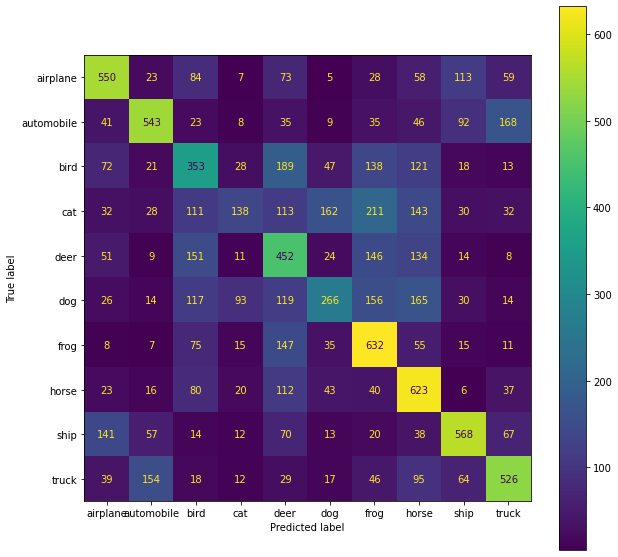

In [ ]:
# MLP confusion matrix
draw_matrix(y_test, pred_MLP)

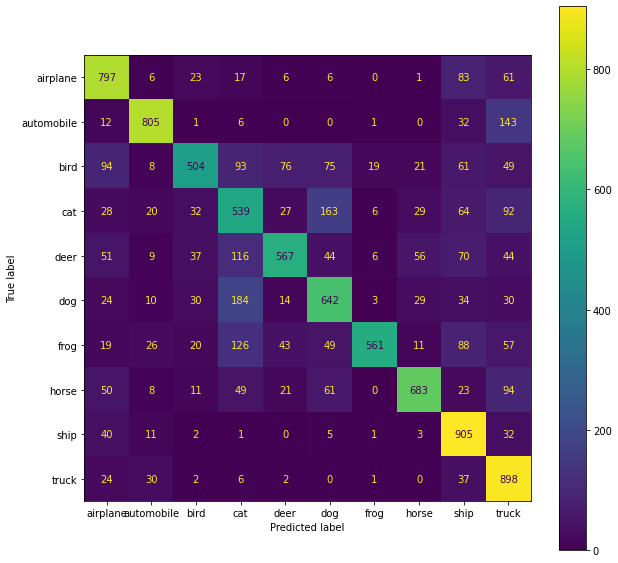

In [ ]:
# CNN confusion matrix
draw_matrix(y_test, pred_CNN)

In [ ]:
# display random predict results, 1st param is predict value from model, 
# 2nd is how many random images you'd like to display
def randpred(pred, count):
  # set figure size
  fig=plt.figure(figsize=(15,5))

  # add images and labels
  for i in range(count):
    # add subplots
    fig.add_subplot(2, 10, i+1)
    # get random index
    index = np.random.randint(len(y_test))
    # show images
    plt.imshow(X_test[index])
    # add labels
    plt.xlabel(class_names[pred[index]])
  plt.show()

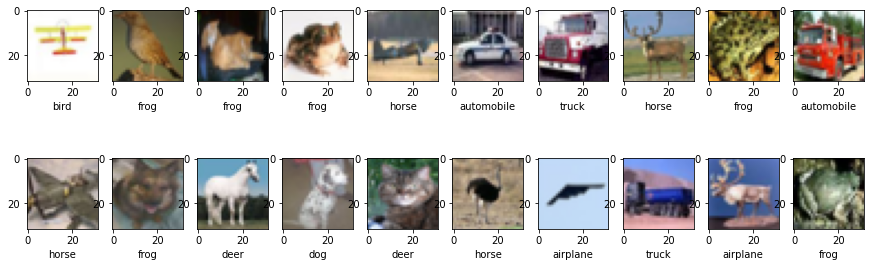

In [ ]:
# random predict results of MLP 
randpred(pred_MLP, 20)

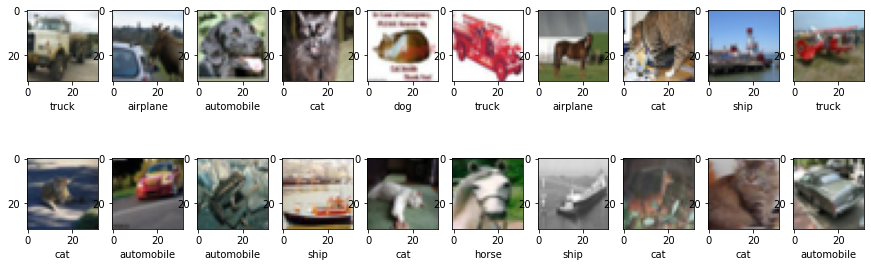

In [ ]:
# random predict results of CNN 
randpred(pred_CNN, 20)

###6. Compare

As the above output
1. accurancy score, (CNN has higehr classification accurancy than MLP )
2. f1 score, (CNN has higehr f1 score than MLP )
3. confusion matrix and   (CNN has better confusion matrix than MLP )
4. random predict results,   (CNN has better random predict results )
5. network architectures (The network architectures of CNN is more complicated)

the CNN model is better than MLP in this project. 